<a href="https://colab.research.google.com/github/damizarate/Proyecto-Final-DSII/blob/main/actividad_pr%C3%A1ctica_FeatureSelection_Dami%C3%A1n_Z%C3%A1rate_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**▲"Análisis de ventas de Fleet DEZ SA para Proyecto DS2 de Coderhouse"**

---



**Abstracto y motivación**

Este análisis se centra en las ventas de Fleet DEZ SA durante el año 2023, con el propósito de identificar patrones en los datos que permitan realizar proyecciones confiables para el futuro. Utilizando datos históricos de ventas, el objetivo es modelar los comportamientos de los clientes y predecir el rendimiento futuro de las ventas, lo que permitirá a la empresa optimizar su toma de decisiones estratégicas. La audiencia principal de este análisis son los equipos de Marketing, Finanzas y Gerencia, quienes se beneficiarán de estas proyecciones para planificar campañas de marketing, asignar recursos y establecer expectativas de ingresos a lo largo del año. El análisis también está dirigido a los desarrolladores de estrategias comerciales, quienes podrán ajustar sus planes con base en las tendencias previstas.

El principal problema que se busca resolver es predecir las ventas futuras de la empresa utilizando modelos de regresión. Este análisis permite responder preguntas clave, como:

¿Cómo se comportarán las ventas de Fleet DEZ SA en el año 2024 basándonos en los datos históricos del 2023?
¿Cuáles son los principales factores que influyen en el comportamiento de las ventas, y cómo podemos ajustar la estrategia de ventas para maximizar los ingresos?
El problema principal se enmarca dentro de una regresión, ya que el objetivo es predecir un valor continuo (ventas en USD) a partir de múltiples variables predictoras.



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
sns.set()
from sklearn.cluster import KMeans

# Cargo el dataset desde Google Drive, en clase utilizamos el nomeclatura df, en mi caso para no cinfundirme llamara la dataframe como "data"

from google.colab import drive
drive.mount('/content/drive')

# Cambio esta ruta al path de tu archivo en Google Drive
data = pd.read_excel('/content/drive/My Drive/TP DS/TPF/Ventas 2023.xlsx')

data.head()




Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Fecha de emisión,IDMOTIVO,Fecha de emisión(2),Hora de emisión (hh:mm:ss),Hora emisión hh,Tipo comprobante,Nro. comprobante,Día del Mes,Día de la Semana,Cód. Talonario,...,Cód. asiento,Desc. asiento,Cód. Motivo Nota de Crédito,Motivo Nota de Crédito,Cód. Dirección de entrega,Cód. provincia (Dirección entrega),Nombre provincia (Dirección entrega),Orden Tango Tiendas,tc,ventas USD
0,2023-01-02,NaN,2023-01-02,15:02:13,15 hs.,FAC,A0000700003603,2,LUNES,13,...,1,FACTURAS / NOTAS DE DEBITO,NaN,NaN,PRINCIPAL,1,Buenos Aires,Ver detalle,346,7576.814393
1,2023-01-02,NaN,2023-01-02,17:48:18,17 hs.,FAC,A0000700003606,2,LUNES,13,...,1,FACTURAS / NOTAS DE DEBITO,NaN,NaN,PRINCIPAL,1,Buenos Aires,Ver detalle,346,318.605116
2,2023-01-02,NaN,2023-01-02,17:58:50,17 hs.,FAC,A0000700003607,2,LUNES,13,...,1,FACTURAS / NOTAS DE DEBITO,NaN,NaN,PRINCIPAL,3,Córdoba,Ver detalle,346,327.963757
3,2023-01-02,NaN,2023-01-02,15:11:04,15 hs.,FAC,A0000800001666,2,LUNES,100,...,1,FACTURAS / NOTAS DE DEBITO,NaN,NaN,PRINCIPAL,1,Buenos Aires,Ver detalle,346,1188.034682
4,2023-01-02,NaN,2023-01-02,12:12:33,12 hs.,FAC,A0000700003627,2,LUNES,13,...,1,FACTURAS / NOTAS DE DEBITO,NaN,NaN,PRINCIPAL,0,Capital Federal,Ver detalle,346,3685.608844


#**▲Quiero sabes la proporción de venta en USD agrupado por clientes, que se detalle los 5 principales clientes y los demás lo agrupe en "otros"**


---




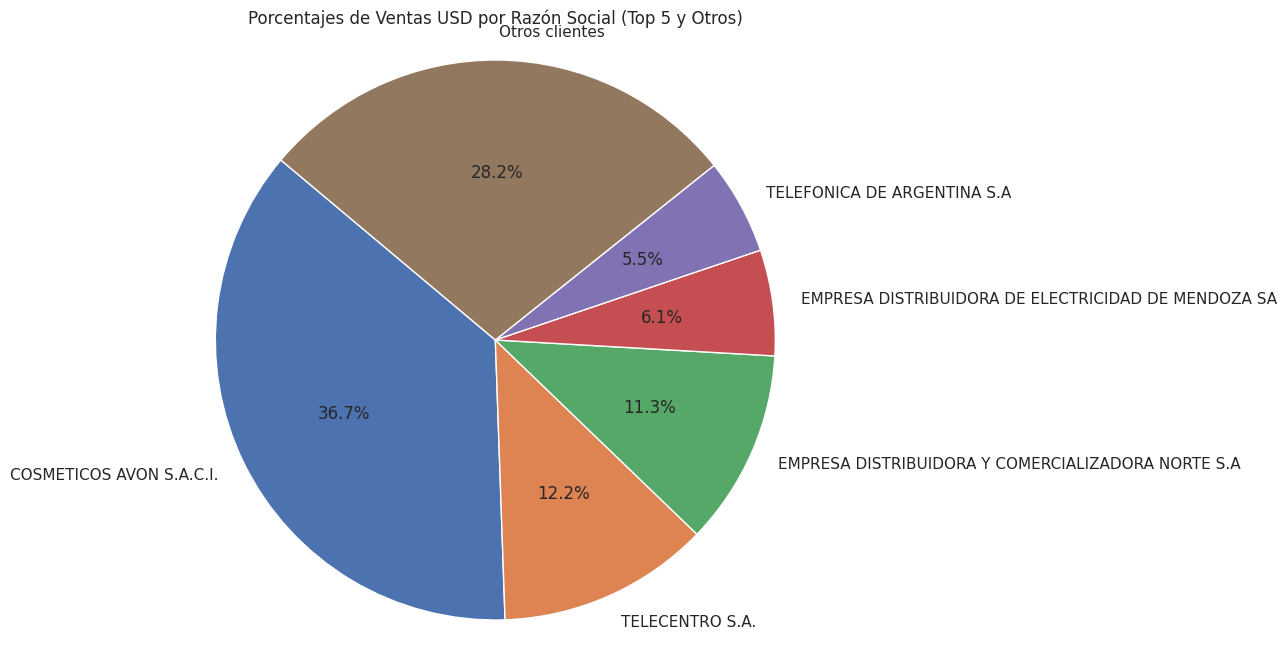

In [ ]:
# Agrupo los datos por "Razón social" y sumar las "ventas USD"
grouped_data = data.groupby('Razón social')['ventas USD'].sum()

# Ordeno los datos y seleccionar los 5 clientes más grandes
top_5 = grouped_data.nlargest(5)

# Calculo el total de los otros clientes
other = grouped_data.sum() - top_5.sum()

# creo una Serie con los top 5 y los otros
top_5['Otros clientes'] = other

# creo el gráfico de torta
plt.figure(figsize=(10, 8))
plt.pie(top_5, labels=top_5.index, autopct='%1.1f%%', startangle=140)
plt.title('Porcentajes de Ventas USD por Razón Social (Top 5 y Otros)')
plt.axis('equal')
plt.show()



```
# Esto tiene formato de código
```

**Conclusión: Cosmeticos Avon es el principal cliente de logistica Fleet DEZ SA, seguido por "Telecentro"**



```
# Esto tiene formato de código
```

# **▲Quiero conocer las ventas en USD en función de la fechas del 2023**


---






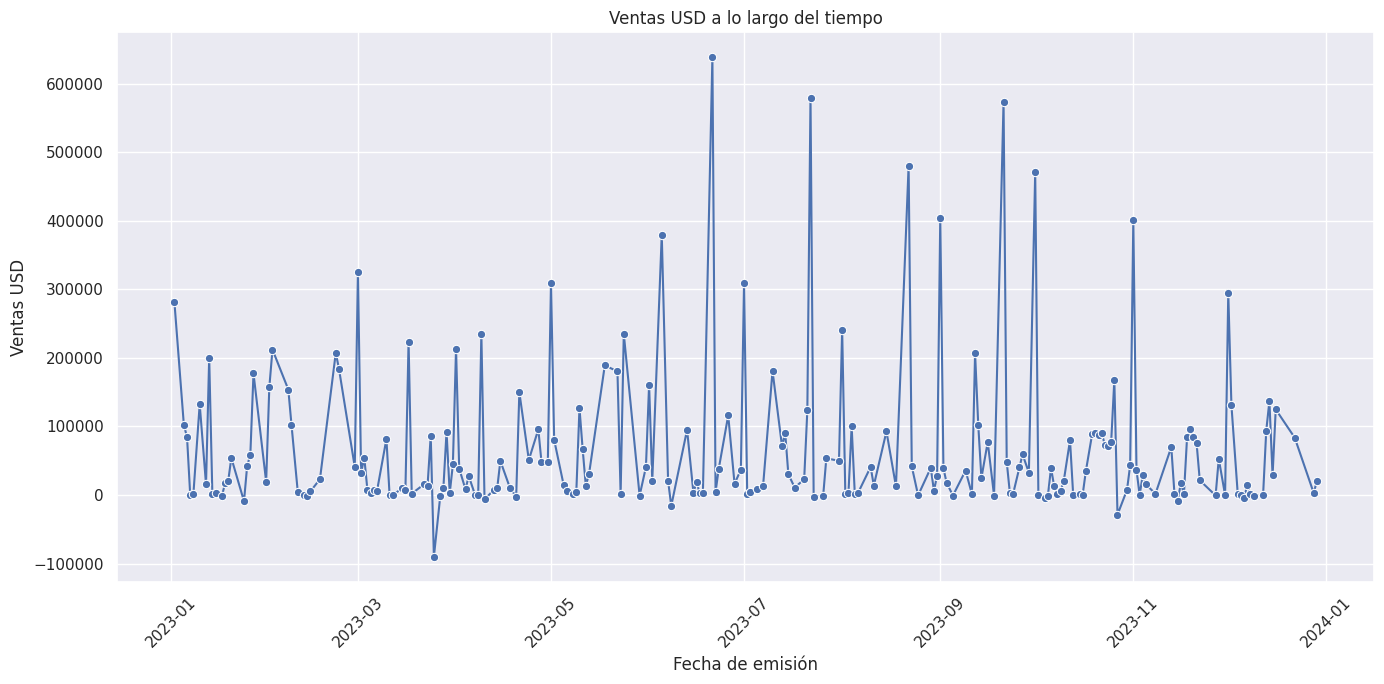

In [ ]:
# Me aseguro de que la columna 'Fecha de emisión' sea de tipo datetime
data['Fecha de emisión'] = pd.to_datetime(data['Fecha de emisión'])

# Agrupo las ventas por fecha
time_series = data.groupby('Fecha de emisión')['ventas USD'].sum()

# Creo el gráfico de tiempo
plt.figure(figsize=(14, 7))
sns.lineplot(data=time_series, marker='o')
plt.title('Ventas USD a lo largo del tiempo')
plt.xlabel('Fecha de emisión')
plt.ylabel('Ventas USD')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mejor legibilidad
plt.grid(True)
plt.tight_layout()  # Ajustar el layout para evitar superposiciones
plt.show()

#**▲Se necesita saber las ventas netas que acumulan cada tipo de comprobante (en el caso de "Nota de Credito" y "Ajustes" se mostrara en negativo ya que es saldo a favor del cliente)**

---



<ipython-input-19-a55dc6f11bbf>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grouped_data, x='SubTotal', y='Desc. talonario', palette='viridis')


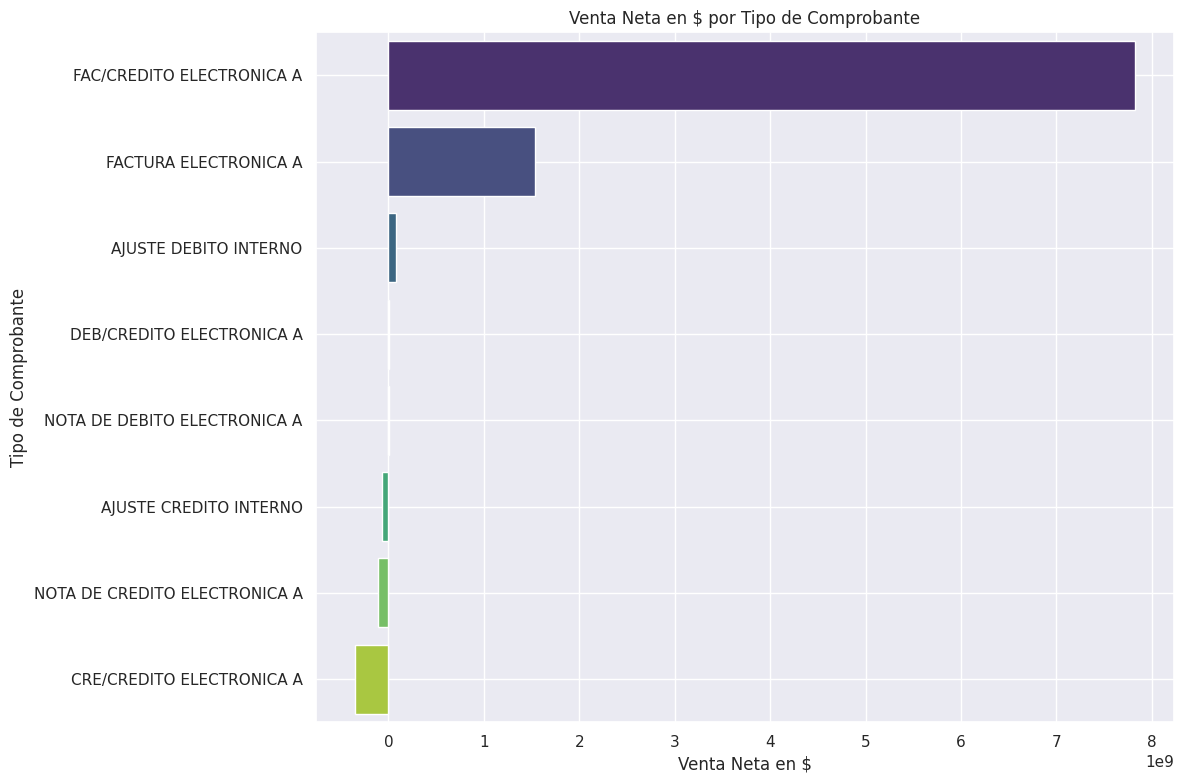

In [ ]:
# Agrupo los datos por "Desc. talonario" y sumar los "SubTotal"
grouped_data = data.groupby('Desc. talonario')['SubTotal'].sum().reset_index()

# Ordeno los datos por "SubTotal" de manera descendente para un mejor gráfico
grouped_data = grouped_data.sort_values(by='SubTotal', ascending=False)

# creo el gráfico de barras
plt.figure(figsize=(12, 8))
sns.barplot(data=grouped_data, x='SubTotal', y='Desc. talonario', palette='viridis')
plt.title('Venta Neta en $ por Tipo de Comprobante')
plt.xlabel('Venta Neta en $')
plt.ylabel('Tipo de Comprobante')
plt.grid(True)
plt.tight_layout()
plt.show()

**"Conclusión: las Facturas Electronicas son las que acumulan mayor importe en ventas netas en pesos"**


#**▲Analizamos la ventas y su distribución, es decir, si las ventas tienen una tendencia central, si están sesgadas hacia un lado o si hay picos de venta en pesos en ciertos rangos de valor.**

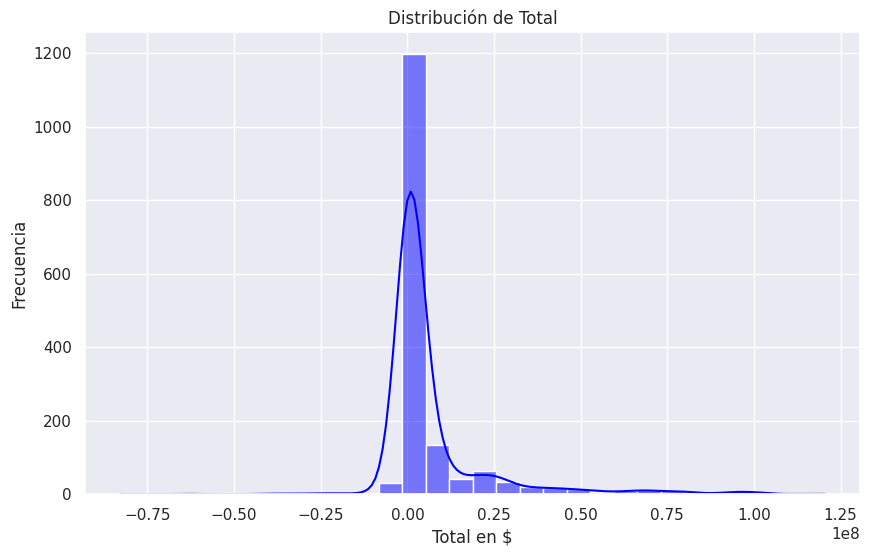

In [ ]:
# Generar un gráfico de distribución para el campo "Total"
plt.figure(figsize=(10, 6))
sns.histplot(data['Total'], bins=30, kde=True, color='blue')
plt.title('Distribución de Total')
plt.xlabel('Total en $')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()


#**Verifico los tipos de datos del Dataset**

In [ ]:
# verifico los tipos de datos
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1616 entries, 0 to 1615
Data columns (total 84 columns):
 #   Column                                           Non-Null Count  Dtype         
---  ------                                           --------------  -----         
 0   Fecha de emisión                                 1616 non-null   datetime64[ns]
 1   IDMOTIVO                                         0 non-null      float64       
 2   Fecha de emisión(2)                              1616 non-null   datetime64[ns]
 3   Hora de emisión (hh:mm:ss)                       1616 non-null   object        
 4   Hora emisión hh                                  1616 non-null   object        
 5   Tipo comprobante                                 1616 non-null   object        
 6   Nro. comprobante                                 1616 non-null   object        
 7   Día del Mes                                      1616 non-null   int64         
 8   Día de la Semana                      


#**▲Se crea un algoritmo de regresión para pronosticar las ventas 2024 en función de las ventas 2023**

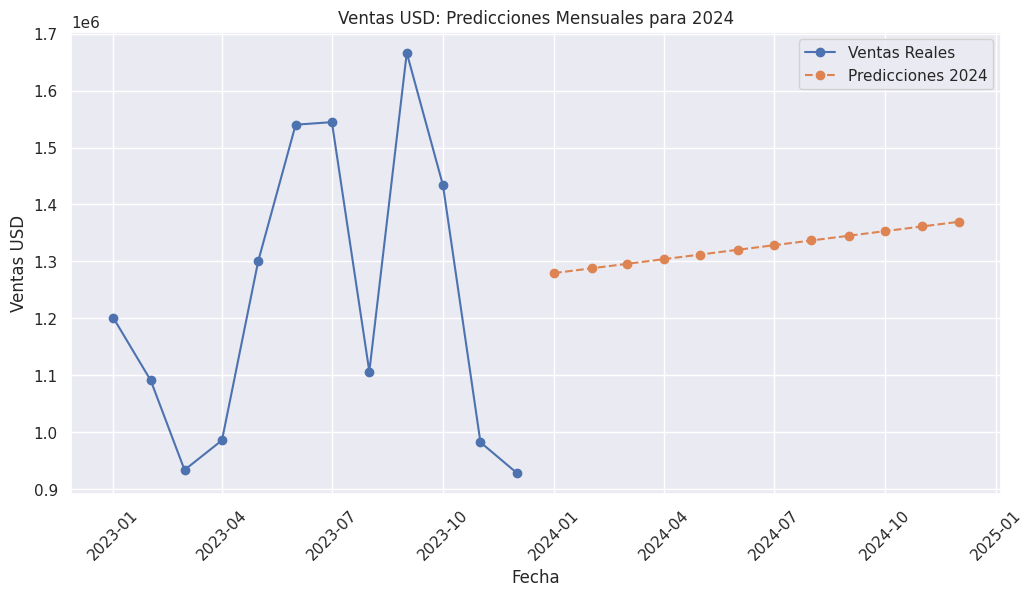

In [ ]:



from sklearn.linear_model import LinearRegression
# Creo una columna de año y mes
data['AñoMes'] = data['Fecha de emisión'].dt.to_period('M')

# Agrupo las ventas por año y mes
monthly_sales = data.groupby('AñoMes')['ventas USD'].sum().reset_index()
monthly_sales['AñoMes'] = monthly_sales['AñoMes'].dt.to_timestamp()

X = monthly_sales[['AñoMes']].astype('int64')  # Convertir fechas a enteros
y = monthly_sales['ventas USD']

model = LinearRegression()
model.fit(X, y)

fechas_2024 = pd.date_range(start='2024-01-01', end='2024-12-01', freq='MS')
X_futuro = pd.DataFrame(fechas_2024, columns=['AñoMes']).astype('int64')

predicciones_2024 = model.predict(X_futuro)

plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['AñoMes'], y, label='Ventas Reales', marker='o')
plt.plot(fechas_2024, predicciones_2024, label='Predicciones 2024', linestyle='--', marker='o')
plt.title('Ventas USD: Predicciones Mensuales para 2024')
plt.xlabel('Fecha')
plt.ylabel('Ventas USD')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

**Conclusión: se observa una pendiente levemente inclinada y se estima que las
 ventas 2024 creceran de forma mesurada durante ese año, empezando el año con una suba considerable con respecto a Diciembre 2023, y  al finalizar el año las ventas no superaran los USD1.4MM"**


---



#**▲Ejecutaremos el siguiente codigo para observar el rendimiento de dos modelos de Machine Learning diferentes (regresión lineal y árbol de decisión) en un conjunto de datos que contiene información de ventas. El objetivo principal es determinar cuál de estos modelos ofrece la mejor precisión predictiva y se ajusta mejor a los datos, para que puedas utilizarlo para hacer predicciones de ventas de manera confiable.**



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
RMSE XGBoost: 3836.9793760044386


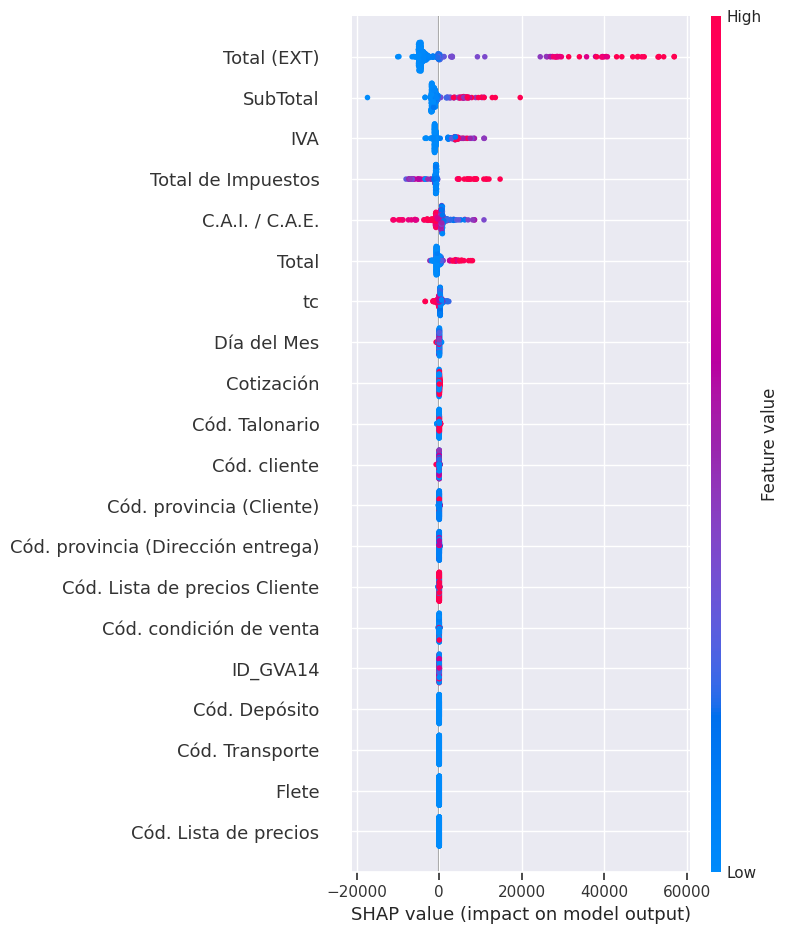

In [ ]:
# Importo las librerías sugeridas para el análisis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb
import shap

# Primero monto Google Drive para acceder al archivo de datos
from google.colab import drive
drive.mount('/content/drive')

# Cargaré los datos desde mi archivo en Google Drive
file_path = '/content/drive/My Drive/TP DS/TPF/Ventas 2023.xlsx'
data = pd.read_excel(file_path)

# Procedo a eliminar las columnas que tienen más de 1000 valores nulos
threshold = 1000
data = data.dropna(thresh=len(data) - threshold, axis=1)

# Luego, separo las variables predictoras de la variable objetivo (ventas USD)
# Me aseguro de excluir columnas irrelevantes para el análisis y solo trabajo con las numéricas
X = data.drop(columns=["Fecha de emisión", "Fecha de emisión(2)", "Hora de emisión (hh:mm:ss)",
                       "Hora emisión hh", "Nombre provincia (Dirección entrega)", "Orden Tango Tiendas",
                       "Día de la Semana", "ventas USD"])
X = X.select_dtypes(include=[np.number])

# Utilizo SimpleImputer para imputar los valores faltantes, si es necesario
imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X)

# Normalizo los datos con StandardScaler para que todas las variables numéricas tengan la misma escala
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# La variable objetivo es 'ventas USD'
y = data["ventas USD"]

# Divido los datos en conjuntos de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Ahora entreno un modelo de XGBoost para mejorar las predicciones
xgboost_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
xgboost_model.fit(X_train, y_train)

# Evaluo el rendimiento del modelo usando validación cruzada con 5 folds
xgb_cv_scores = cross_val_score(xgboost_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
xgb_rmse_cv = np.sqrt(-xgb_cv_scores.mean())

# Muestro el RMSE del modelo de XGBoost para tener una idea de qué tan bueno es
print(f"RMSE XGBoost: {xgb_rmse_cv}")

# A continuación, utilizo SHAP para interpretar el modelo y entender la importancia de cada característica
explainer = shap.Explainer(xgboost_model)
shap_values = explainer(X_test)

# Genero un gráfico resumen con SHAP para visualizar qué variables son más importantes en las predicciones
shap.summary_plot(shap_values, X_test, feature_names=X.columns)


#**▲ Optimización de modelos**

In [ ]:
from sklearn.model_selection import GridSearchCV

# Defino un rango de hiperparámetros para el árbol de decisión
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Configuro GridSearchCV para encontrar los mejores hiperparámetros
grid_search = GridSearchCV(tree_model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Obtengo los mejores hiperparámetros
best_params = grid_search.best_params_
print("Mejores hiperparámetros:", best_params)

# Puedo entrenar un nuevo árbol de decisión con los mejores hiperparámetros encontrados
best_tree_model = grid_search.best_estimator_


Mejores hiperparámetros: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


#**▲El propósito del siguiente análisis es identificar qué características o variables del conjunto de datos son más importantes para el modelo de árbol de decisión en la predicción de las ventas en USD. A través de la evaluación de la importancia de las características, podemos entender cuáles factores influyen más en las predicciones del modelo.**

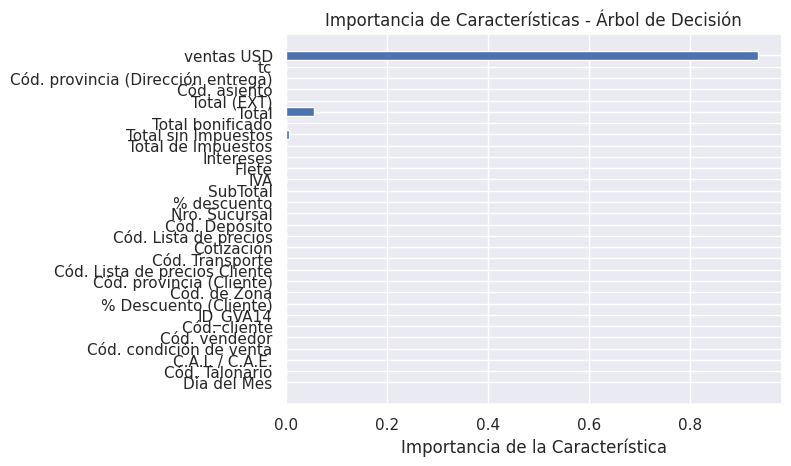

In [ ]:
import matplotlib.pyplot as plt

# Obtener y mostrar la importancia de las características del modelo de árbol de decisión
feature_importances = best_tree_model.feature_importances_
plt.barh(X.columns, feature_importances)
plt.xlabel('Importancia de la Característica')
plt.title('Importancia de Características - Árbol de Decisión')
plt.show()


**Conclusión: El gráfico muestra que el modelo ha utilizado erróneamente la columna "ventas USD" como una característica predictiva, lo cual es incorrecto ya que esta es la variable objetivo que se intenta predecir. Esto indica que se debe corregir el preprocesamiento de los datos, excluyendo "ventas USD" de las variables de entrada. Otras variables como "tc" y "Cód. provincia (Dirección entrega)" también tienen un peso significativo en el modelo, lo que sugiere que son factores importantes para explicar las ventas. Una vez corregido el preprocesamiento, será necesario reevaluar la importancia de las características para obtener un análisis preciso. ***




#**▲En este análisis, se busca evaluar la capacidad del modelo de Random Forest para predecir las ventas en USD. El Random Forest es un algoritmo que combina múltiples árboles de decisión para mejorar la precisión de las predicciones y reducir el riesgo de sobreajuste. A través de este modelo, se pretende determinar su rendimiento y precisión mediante la validación cruzada, evaluando el RMSE (Root Mean Square Error) como métrica clave.**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Entreno un modelo de Random Forest para mejorar las predicciones
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Evalúo el rendimiento del modelo de Random Forest usando validación cruzada con 5 folds
rf_cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
rf_rmse_cv = np.sqrt(-rf_cv_scores.mean())

# Comparo el RMSE del modelo de Random Forest para ver su rendimiento
print("RMSE Random Forest:", rf_rmse_cv)


RMSE Random Forest: 2109.9473421868047


**Conclusión: El valor obtenido del RMSE del Random Forest fue de 2109.95 sugiere el nivel de error entre las predicciones del modelo y los valores reales en las ventas.**

#**▲Este análisis compara dos modelos predictivos, regresión lineal y árbol de decisión, en su capacidad para predecir ventas en USD. Se busca determinar cuál modelo ofrece un mejor ajuste a través del RMSE (Root Mean Square Error), una métrica que mide el error promedio entre las predicciones y los valores reales de ventas. Los modelos han sido entrenados considerando variables relacionadas con las ventas, como fechas de emisión y datos geográficos.**

In [ ]:
from sklearn.metrics import mean_squared_error

# Primero, evalúo el rendimiento del modelo en el conjunto de prueba
y_pred_linear = linear_model.predict(X_test)
y_pred_tree = best_tree_model.predict(X_test)

# Calculo el RMSE en el conjunto de prueba para ambos modelos para ver cuál es más preciso
rmse_test_linear = np.sqrt(mean_squared_error(y_test, y_pred_linear))
rmse_test_tree = np.sqrt(mean_squared_error(y_test, y_pred_tree))

print(f"RMSE en prueba - Regresión Lineal: {rmse_test_linear}")
print(f"RMSE en prueba - Árbol de Decisión: {rmse_test_tree}")

RMSE en prueba - Regresión Lineal: 1.1493573346846211e-09
RMSE en prueba - Árbol de Decisión: 1547.0521882574044


**Conclusión**: Regresión Lineal (RMSE: 1.149e-09): Aunque su RMSE es extremadamente bajo, esto sugiere un posible sobreajuste. El modelo parece haber memorizado los datos, limitando su capacidad para generalizar a nuevos casos.

Árbol de Decisión (RMSE: 1547.05): Presenta un mayor error, pero captura mejor las relaciones no lineales de los datos. Aún así, necesita ajustes para mejorar su precisión.

En resumen, la regresión lineal tiene un RMSE más bajo pero puede no generalizar bien. El árbol de decisión, aunque con mayor error, tiene potencial para mejorarse con optimización**

#***▲se enfoca en comparar múltiples modelos (Regresión Lineal, Árbol de Decisión, XGBoost, y Random Forest) y seleccionar el mejor modelo basado en el RMSE. La comparación incluye los modelos ya entrenados y evaluados en el conjunto de prueba.***

In [ ]:
# Comparo los RMSE de los modelos entrenados
print(f"RMSE en validación cruzada - Regresión Lineal: {linear_rmse_cv}")
print(f"RMSE en validación cruzada - Árbol de Decisión: {tree_rmse_cv}")
print(f"RMSE en validación cruzada - XGBoost: {xgb_rmse_cv}")
print(f"RMSE en prueba - Regresión Lineal: {rmse_test_linear}")
print(f"RMSE en prueba - Árbol de Decisión: {rmse_test_tree}")
print(f"RMSE en validación cruzada - Random Forest: {rf_rmse_cv}")

# Selección final del mejor modelo en función del RMSE
if xgb_rmse_cv < linear_rmse_cv and xgb_rmse_cv < tree_rmse_cv and xgb_rmse_cv < rf_rmse_cv:
    print("El modelo seleccionado es XGBoost debido a su menor RMSE y mejor capacidad de generalización.")
    mejor_modelo = xgboost_model
elif tree_rmse_cv < linear_rmse_cv and tree_rmse_cv < rf_rmse_cv:
    print("El modelo seleccionado es Árbol de Decisión debido a su mejor rendimiento en validación cruzada.")
    mejor_modelo = tree_model
elif rf_rmse_cv < linear_rmse_cv and rf_rmse_cv < tree_rmse_cv:
    print("El modelo seleccionado es Random Forest debido a su menor RMSE en validación cruzada.")
    mejor_modelo = rf_model
else:
    print("El modelo seleccionado es Regresión Lineal debido a su bajo RMSE en el conjunto de prueba.")
    mejor_modelo = linear_model


RMSE en validación cruzada - Regresión Lineal: 6.029688800978209e-10
RMSE en validación cruzada - Árbol de Decisión: 2240.7351741415746
RMSE en validación cruzada - XGBoost: 3836.9793760044386
RMSE en prueba - Regresión Lineal: 1.1493573346846211e-09
RMSE en prueba - Árbol de Decisión: 1547.0521882574044
RMSE en validación cruzada - Random Forest: 2109.9473421868047
El modelo seleccionado es Regresión Lineal debido a su bajo RMSE en el conjunto de prueba.


**Conclusión**: El modelo de Regresión Lineal fue seleccionado como el más adecuado debido a su bajo RMSE, lo que indica una alta precisión en la predicción de las ventas en USD. Esto permitirá a Fleet DEZ SA realizar proyecciones más confiables basadas en variables como las fechas de emisión, el tipo de comprobante y otros factores clave del proceso de ventas. Esta mayor precisión contribuirá a mejorar la planificación de estrategias de marketing, la asignación de recursos y la optimización del flujo de ingresos al prever de manera más exacta las ventas futuras y ajustar mejor las decisiones comerciales.